Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Constants

In [9]:
a = 0.1
b = 0.02
c = 0.1
e = 0.02

initial_conditions_stationary = [c/e, a/b]
initial_conditions_small_deviation = [c/e + 0.1, a/b + 0.1]
initial_conditions_large_deviation = [c/e + 0.5, a/b + 1]

t = np.linspace(0, 500, 1000)

Auxiliary Functions

In [10]:
def predator_prey_system(_, y_p, a_p, b_p, c_p, e_p):
    R, P = y_p
    dRdt = a_p * R - b_p * P * R
    dPdt = -c_p * P + e_p * P * R
    
    return [dRdt, dPdt]

def runge_kutta4(f, y0, t0, args):
    h = t0[1] - t0[0]
    y = np.zeros((len(t0), len(y0)))
    y[0] = y0
    for i in range(1, len(t0)):
        k1 = np.multiply(f(t0[i - 1], y[i - 1], *args), h)
        k2 = np.multiply(f(t0[i - 1] + 0.5 * h, y[i - 1] + 0.5 * k1, *args), h)
        k3 = np.multiply(f(t0[i - 1] + 0.5 * h, y[i - 1] + 0.5 * k2, *args), h)
        k4 = np.multiply(f(t0[i - 1] + h, y[i - 1] + k3, *args), h)
        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return y

Main Function

In [11]:
def simulate() -> (np.ndarray, np.ndarray, np.ndarray) :
    stationary_points = runge_kutta4(
        predator_prey_system, 
        initial_conditions_stationary, 
        t, 
        (a, b, c, e)
    ) 
    small_deviation_points = runge_kutta4(
        predator_prey_system, 
        initial_conditions_small_deviation, 
        t, 
        (a, b, c, e)
    )    
    large_deviation_points = runge_kutta4(
        predator_prey_system, 
        initial_conditions_large_deviation, 
        t, 
        (a, b, c, e)
    )
    
    return stationary_points, small_deviation_points, large_deviation_points

Simulation

In [12]:
y_stationary, y_small_deviation, y_large_deviation = simulate()

Plotting

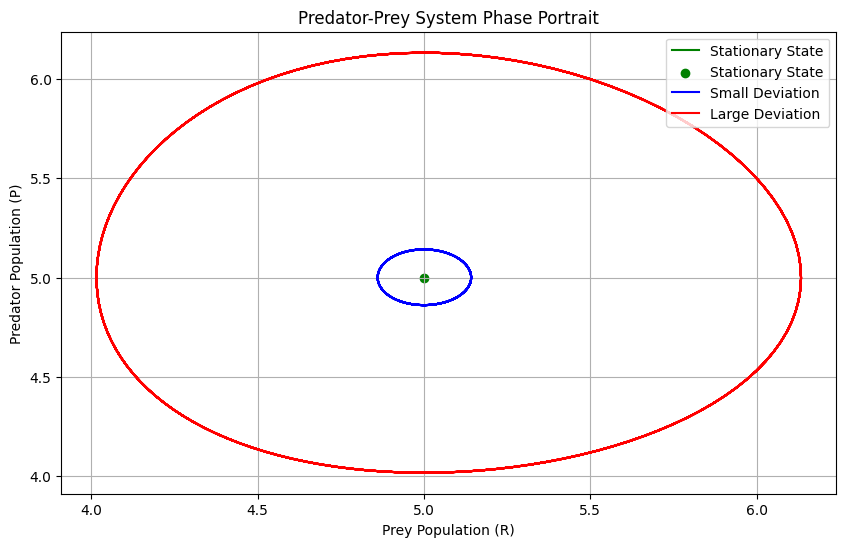

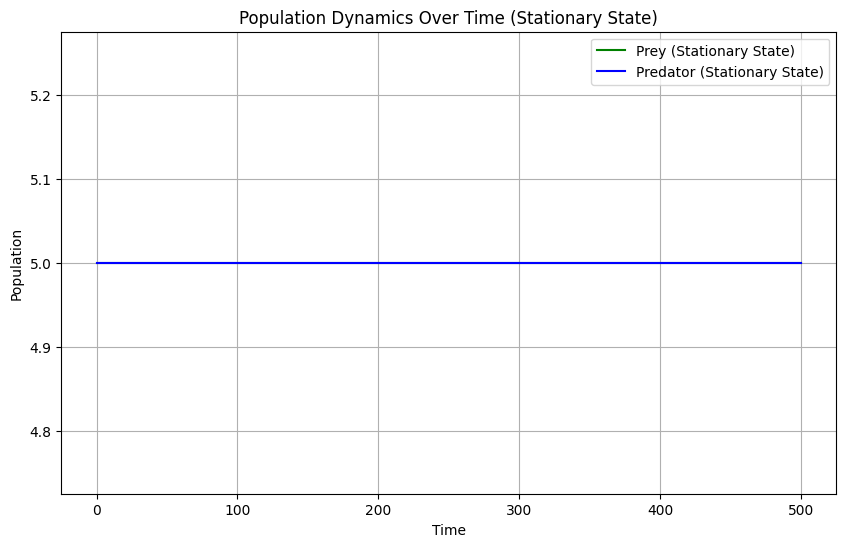

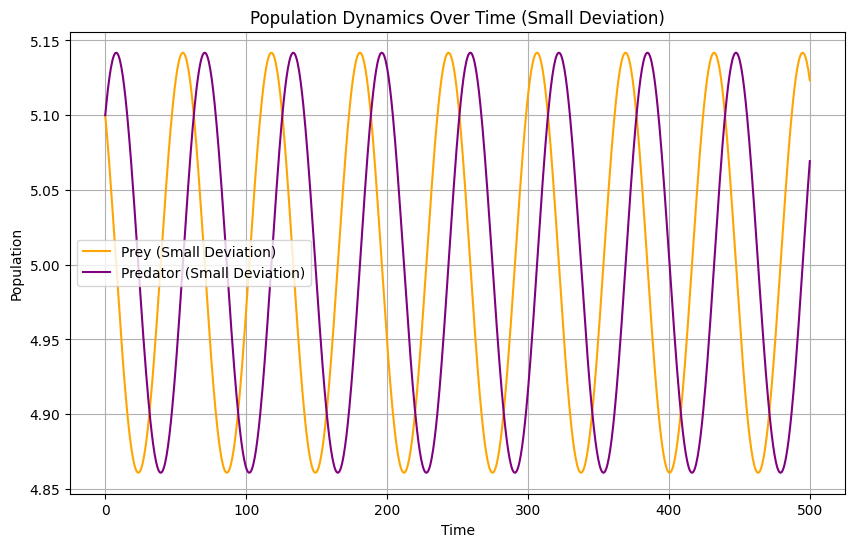

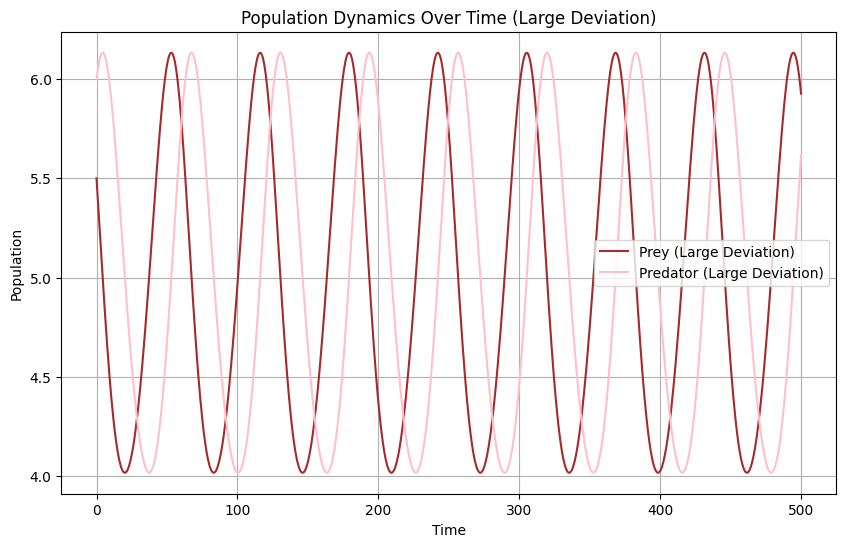

In [13]:
# Phase portrait with stationary state marked
plt.figure(figsize=(10, 6))
plt.plot(y_stationary[:, 0], y_stationary[:, 1], label='Stationary State', color='green')
plt.scatter(initial_conditions_stationary[0], initial_conditions_stationary[1], color='green', marker='o', label='Stationary State')
plt.plot(y_small_deviation[:, 0], y_small_deviation[:, 1], label='Small Deviation', color='blue')
plt.plot(y_large_deviation[:, 0], y_large_deviation[:, 1], label='Large Deviation', color='red')
plt.title('Predator-Prey System Phase Portrait')
plt.xlabel('Prey Population (R)')
plt.ylabel('Predator Population (P)')
plt.legend()
plt.grid(True)
plt.show()

# Population dynamics over time for stationary state
plt.figure(figsize=(10, 6))
plt.plot(t, y_stationary[:, 0], label='Prey (Stationary State)', color='green')
plt.plot(t, y_stationary[:, 1], label='Predator (Stationary State)', color='blue')
plt.title('Population Dynamics Over Time (Stationary State)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Population dynamics over time for small deviation
plt.figure(figsize=(10, 6))
plt.plot(t, y_small_deviation[:, 0], label='Prey (Small Deviation)', color='orange')
plt.plot(t, y_small_deviation[:, 1], label='Predator (Small Deviation)', color='purple')
plt.title('Population Dynamics Over Time (Small Deviation)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Population dynamics over time for large deviation
plt.figure(figsize=(10, 6))
plt.plot(t, y_large_deviation[:, 0], label='Prey (Large Deviation)', color='brown')
plt.plot(t, y_large_deviation[:, 1], label='Predator (Large Deviation)', color='pink')
plt.title('Population Dynamics Over Time (Large Deviation)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()